<a href="https://colab.research.google.com/github/YanNews2805/C-lculo-Num-rico/blob/main/TrabalhoFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Método de Newton Multivariável

          t     alpha      resíduos          erro
0  0.500000  0.448181 -5.181916e-02  5.046610e-01
1  0.582725  0.946178  5.807218e-01  4.618735e-02
2  0.628110  0.936491  3.569875e-02  2.753947e-04
3  0.627860  0.936376 -3.653532e-04  3.910203e-07
4  0.627860  0.936376 -6.725576e-08  4.303133e-07
5  0.627860  0.936376  3.059437e-15  4.303133e-07
6  0.627860  0.936376 -3.118447e-16  4.303133e-07
7  0.627860  0.936376 -3.764533e-17  4.303133e-07
8  0.627860  0.936376  3.494900e-16  4.303133e-07
9  0.627860  0.936376 -3.494900e-16  4.303133e-07


<Figure size 432x288 with 0 Axes>

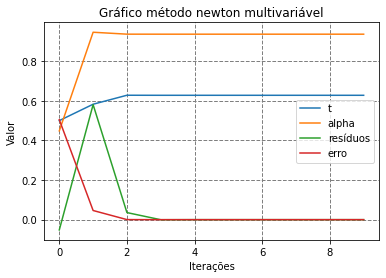

In [2]:
# 2 Método de Newton multivariável

from math import cos,sin,pi,exp,sqrt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Matriz coluna

dataframe = pd.DataFrame(columns=["t","alpha","resíduos", "erro"])


def Fs(t,alpha):
  f1 = 1 - np.cos(alpha)*t -t
  f2 = np.sin(alpha) * t -0.1 * t**2 -1 + np.e**(-t)
  return np.matrix([[f1],[f2]])

# Inversa da matriz
def Jinv(t,alpha):
  # Matriz Jacobiana
  J = np.matrix([[-np.cos(alpha) -1,t*np.sin(alpha)],[-0.2*t -np.e**(-t) + sin(alpha),t*cos(alpha)]])
  JV = np.linalg.inv(J)
  return [J, JV]


TOL = 10**(-6)

# Tempo e alfa iniciais
P0 = [1,0]

t, alpha = P0

k = 0
converg = [0.627860 , 0.936376]
erro = np.sqrt((t - converg[0])**2 + (alpha - converg[1])**2)


while  k < 10:
  J, JI = Jinv(t,alpha)
  F = Fs(t,alpha)
  Y = -JI*F
  X = np.matrix(P0).T+Y
  t,alpha = float(X[0][0]),float(X[1][0])
  mag = sqrt((t-P0[0])**2+(alpha-P0[1])**2)
  P0 = [t,alpha]
  residuo = float(Y[0][0]+Y[1][0])
  erro = np.sqrt((t - converg[0])**2 + (alpha - converg[1])**2)
  dataframe = dataframe.append({"t": t, "alpha": alpha, "resíduos": residuo, "erro": erro}, ignore_index=True)
  k+=1
  


#2.2:
print(dataframe[["t","alpha","resíduos","erro"]])

#2.3:
plt.figure()
dataframe.plot(use_index=True)
plt.grid(b=True, which='both', axis='both', color='gray', linestyle='--', linewidth=1)
plt.title("Gráfico método newton multivariável")
plt.xlabel("Iterações")
plt.ylabel("Valor")
plt.show()

Interceptação de objeto

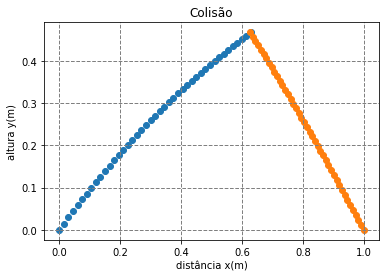

In [3]:
p1_x = []
p1_y = []
p2_x = []
p2_y = []
alfa = 0.936376
for t in range(0, 645, 15):
  t /= 1000
  p1_x.append(t)
  p1_y.append(1-np.exp(-t))
  p2_x.append(1-np.cos(alfa)*t)
  p2_y.append(np.sin(alfa)*t-0.1*np.power(t, 2))


plt.figure()
plt.scatter(p1_x,p1_y)
plt.scatter(p2_x,p2_y)
plt.grid(b=True, which='both', axis='both', color='gray', linestyle='--', linewidth=1)
plt.title("Colisão")
plt.xlabel("distância x(m)")
plt.ylabel("altura y(m)")
plt.show()

# Método de Euler

Valor de y'(0.2)= 2.16791793980021
Valor de y(0.2)= 0.41830204076930505


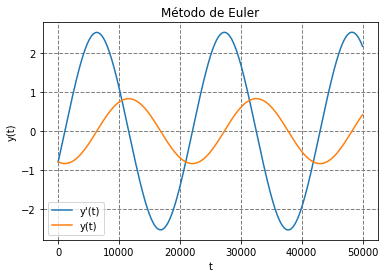

In [4]:
import sympy as sym
import pandas as pd
import matplotlib.pyplot as plt


g = 9.81
l = 1
def equation(y, t):
  return -(g/l)*np.sin(y)


y0 = -np.pi/4
yi0 = 0
tout = np.arange(start=0, stop=5, step=0.0001)

def euler(rhs, y0, yi0, tout):
    y0 = np.atleast_1d(np.asarray(y0, dtype=np.float64))
    yi0 = np.atleast_1d(np.asarray(y0, dtype=np.float64))
    dydt = np.empty_like(y0)
    yout = np.zeros((len(tout), len(y0)))
    yout[0] = y0
    youti = np.zeros((len(tout), len(y0)))
    youti[0] = yi0
    t_old = tout[0]
    for i, t in enumerate(tout[1:], 1):
      h = t - t_old
      yout[i] = yout[i-1] + youti[i-1]*h
      dydt[:] = rhs(yout[i-1], t)
      youti[i] = youti[i-1] + dydt*h
      t_old = t

    return yout, youti

y_out, yi_out = euler(equation,y0, yi0, tout)

series_yi = pd.Series(yi_out.T[0])
series_y = pd.Series(y_out.T[0])
plt.figure()
series_yi.plot(use_index=True, legend=True, label="y'(t)")
series_y.plot(use_index=True, legend=True, label="y(t)")

print("Valor de y'(0.2)=", yi_out[-1][0])
print("Valor de y(0.2)=", y_out[-1][0])


plt.grid(b=True, which='both', axis='both', color='gray', linestyle='--', linewidth=1)
plt.title("Método de Euler")
plt.xlabel("t")
plt.ylabel("y(t)")
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import scipy
from PIL import Image
from scipy import ndimage
from lr_utils import load_dataset

%matplotlib inline

In [ ]:
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()

# Estudo do dataset

y = [0], portanto é  uma imagem non-cat


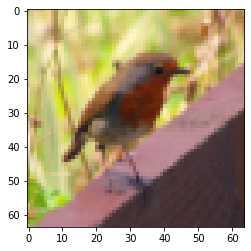

In [ ]:
index = 10
plt.imshow(train_set_x_orig[index])
print ("y = " + str(train_set_y[:,index]) + ", portanto é  uma imagem " + classes[np.squeeze(train_set_y[:,index])].decode("utf-8"))

In [ ]:
m_train = train_set_y.shape[1]
m_test = test_set_y.shape[1]
num_px = train_set_x_orig.shape[1]

print("Shape do vetor X de treino: " + str(train_set_x_orig.shape))
print("Shape do vetor Y de treino: " + str(train_set_y.shape))
print("Shape do vetor X de teste: " + str(test_set_x_orig.shape))
print("Shape do vetor Y de teste: " + str(test_set_y.shape))
print("Número de imagens para treino = " + str(m_train))
print("Número de imagens para teste = " + str(m_test))
print("Tamanho e largura de cada imagem = " + str(num_px))
print("Tamanho de cada imagem: (" + str(num_px) + ", " + str(num_px) + ", 3)")

Shape do vetor X de treino: (209, 64, 64, 3)
Shape do vetor Y de treino: (1, 209)
Shape do vetor X de teste: (50, 64, 64, 3)
Shape do vetor Y de teste: (1, 50)
Número de imagens para treino = 209
Número de imagens para teste = 50
Tamanho e largura de cada imagem = 64
Tamanho de cada imagem: (64, 64, 3)


# Ajuste do dataset

In [ ]:

train_set_x_flatten = train_set_x_orig.reshape(train_set_x_orig.shape[0], -1).T
test_set_x_flatten = test_set_x_orig.reshape(test_set_x_orig.shape[0], -1).T

train_set_x = train_set_x_flatten / 255.
test_set_x = test_set_x_flatten / 255.
print("Novo shape do vetor X de treino: " + str(train_set_x_flatten.shape))
print("Novo shape do vetor Y de treino: " + str(train_set_y.shape))
print("Novo shape do vetor X de teste: " + str(test_set_x_flatten.shape))
print("Novo shape do vetor Y de teste: " + str(test_set_y.shape))

Novo shape do vetor X de treino: (12288, 209)
Novo shape do vetor Y de treino: (1, 209)
Novo shape do vetor X de teste: (12288, 50)
Novo shape do vetor Y de teste: (1, 50)


# Sigmoid

In [ ]:
def sigmoid(z):

    s = 1/(1 + np.exp(-z))
    
    return s

# Inicializar Parâmetros

In [ ]:
def initialize_with_zeros(dim):
    w, b = np.zeros((int(dim), 1)), 0
    return w, b

# Propagação

In [ ]:
# GRADED FUNCTION: propagate

def propagate(w, b, X, Y):
    
    m = X.shape[1]
    
    A = sigmoid(np.dot(w.T,X)+b)
    cost = (-1/m)*np.sum(Y*np.log(A)+(1-Y)*np.log(1-A))
    
    dw = (1/m)*np.dot(X,(A-Y).T)
    db = (1/m)*np.sum(A-Y)

    grads = {"dw": dw,
             "db": db}
    
    return grads, cost

# Otimização

In [ ]:

def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
    costs = []
    for i in range(num_iterations):
        grads, cost = propagate(w, b, X, Y)

        dw = grads["dw"]
        db = grads["db"]
        w = w - learning_rate*dw
        b = b - learning_rate*db
        
        
        if i % 100 == 0:
            costs.append(cost)

        if print_cost and i % 100 == 0:
            print ("Custo depois da iteração %i: %f" %(i, cost))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs

# Predição

In [ ]:
def predict(w, b, X):
    
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0], 1)
    
    A = sigmoid(np.dot(w.T,X)+b)
    
    for i in range(A.shape[1]):        
        if(A[0, i] > 0.5):
            Y_prediction[0, i] = 1
        else:
            Y_prediction[0, i] = 0
        
    return Y_prediction

# Modelo

In [ ]:
def model(X_train, Y_train, X_test, Y_test, num_iterations, learning_rate = 0.5, print_cost = False):
    w, b = initialize_with_zeros(X_train.shape[0])

    parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)

    w = parameters["w"]
    b = parameters["b"]
    
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)


    print("Acurácia de treino: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("Acurácia de teste: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))
    print("Valor ótimo para o vetor w(norma): {}".format(np.linalg.norm(w)))
    print("Valor ótimo para o escalar b: {}".format(b))

    
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d

# Treinamento

In [ ]:
d = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations=1000, learning_rate = 0.001, print_cost = True)

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.591289
Cost after iteration 200: 0.555796
Cost after iteration 300: 0.528977
Cost after iteration 400: 0.506881
Cost after iteration 500: 0.487880
Cost after iteration 600: 0.471108
Cost after iteration 700: 0.456046
Cost after iteration 800: 0.442350
Cost after iteration 900: 0.429782
train accuracy: 86.60287081339713 %
test accuracy: 62.0 %
Valor ótimo para o vetor w(norma): 0.44923156418503846
Valor ótimo para o escalar b: -0.008612734366979905


O modelo previu que é um gato


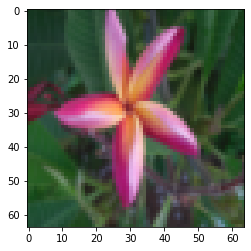

In [ ]:
index = 16
plt.imshow(test_set_x[:,index].reshape((num_px, num_px, 3)))
# print ("y = " + str(test_set_y[0, index]) + ", o modelo previu \"" + str(int(d["Y_prediction_test"][0, index])) +  "\"")
print ("O modelo previu que é um gato")

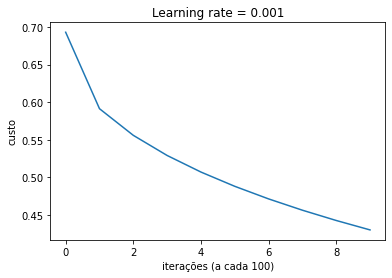

In [ ]:
# Plot learning curve (with costs)
costs = np.squeeze(d['costs'])
plt.plot(costs)
plt.ylabel('custo')
plt.xlabel('iterações (a cada 100)')
plt.title("Learning rate = " + str(d["learning_rate"]))
plt.show()

# Testes com diferentes parâmetros

a taxa de aprendizagem é: 0.1


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in multiply
  


train accuracy: 100.0 %
test accuracy: 70.0 %
Valor ótimo para o vetor w(norma): 15.171410096749224
Valor ótimo para o escalar b: 0.13300887498170869

-------------------------------------------------------

a taxa de aprendizagem é: 0.01
train accuracy: 98.56459330143541 %
test accuracy: 70.0 %
Valor ótimo para o vetor w(norma): 2.162628677478891
Valor ótimo para o escalar b: -0.00376969899148927

-------------------------------------------------------

a taxa de aprendizagem é: 0.001
train accuracy: 86.60287081339713 %
test accuracy: 62.0 %
Valor ótimo para o vetor w(norma): 0.44923156418503846
Valor ótimo para o escalar b: -0.008612734366979905

-------------------------------------------------------

a taxa de aprendizagem é: 0.0001
train accuracy: 66.02870813397129 %
test accuracy: 36.0 %
Valor ótimo para o vetor w(norma): 0.0782172086533302
Valor ótimo para o escalar b: -0.0017598633006543573

-------------------------------------------------------



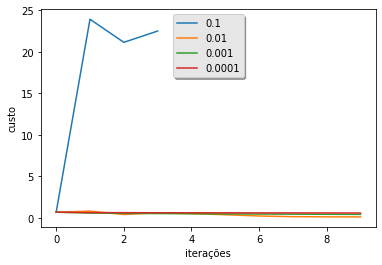

In [ ]:
learning_rates = [0.1, 0.01, 0.001, 0.0001]
models = {}
for i in learning_rates:
    print ("a taxa de aprendizagem é: " + str(i))
    models[str(i)] = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 1000, learning_rate = i, print_cost = False)
    print ('\n' + "-------------------------------------------------------" + '\n')

for i in learning_rates:
    plt.plot(np.squeeze(models[str(i)]["costs"]), label= str(models[str(i)]["learning_rate"]))

plt.ylabel('custo')
plt.xlabel('iterações')

legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()

número de iterações é: 5000
train accuracy: 100.0 %
test accuracy: 68.0 %
Valor ótimo para o vetor w(norma): 3.7607570462923294
Valor ótimo para o escalar b: -0.0032415736658225067

-------------------------------------------------------

número de iterações é: 3000
train accuracy: 100.0 %
test accuracy: 68.0 %
Valor ótimo para o vetor w(norma): 3.18494148543802
Valor ótimo para o escalar b: -0.0036565102180048897

-------------------------------------------------------

número de iterações é: 2000
train accuracy: 99.52153110047847 %
test accuracy: 70.0 %
Valor ótimo para o vetor w(norma): 2.764127562863548
Valor ótimo para o escalar b: -0.0038306654742992865

-------------------------------------------------------

número de iterações é: 1500
train accuracy: 99.52153110047847 %
test accuracy: 68.0 %
Valor ótimo para o vetor w(norma): 2.493147840807467
Valor ótimo para o escalar b: -0.0038534044212633865

-------------------------------------------------------

número de iterações é: 1

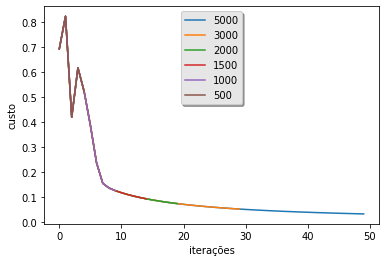

In [ ]:
epoches = [5000, 3000, 2000, 1500, 1000, 500]
models = {}
for e in epoches:
    print ("número de iterações é: " + str(e))
    models[str(e)] = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = e, learning_rate = 0.01, print_cost = False)
    print ('\n' + "-------------------------------------------------------" + '\n')

for e in epoches:
    plt.plot(np.squeeze(models[str(e)]["costs"]), label= str(models[str(e)]["num_iterations"]))

plt.ylabel('custo')
plt.xlabel('iterações')

legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()